In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('happiness_score_dataset.csv')

In [3]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [7]:
print("The shape of dataset is:",df.shape)

The shape of dataset is: (158, 12)


In [8]:
df=df.drop_duplicates()
print(f"rows and columns after dropping duplicates: " ,df.shape)

rows and columns after dropping duplicates:  (158, 12)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [11]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
df.nunique().to_frame("unique values")

,unique values
Country,158
Region,10
Happiness Rank,157
Happiness Score,157
Standard Error,153
Economy (GDP per Capita),158
Family,158
Health (Life Expectancy),157
Freedom,158
Trust (Government Corruption),157


<Axes: >

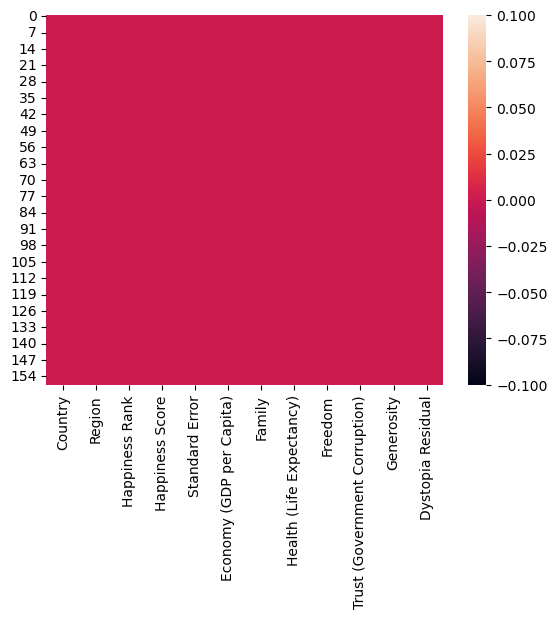

In [13]:
sns.heatmap(df.isnull())

In [14]:
print(df.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [15]:
x = df[['Economy (GDP per Capita)', 'Family','Health (Life Expectancy)' , 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
y=df['Happiness Score']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
print("Training set - Features:", x_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", x_test.shape, "Labels:", y_test.shape)

Training set - Features: (126, 6) Labels: (126,)
Testing set - Features: (32, 6) Labels: (32,)


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = linear_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.24193882833563746
R-squared: 0.8294705100069293


In [21]:
coefficients = linear_model.coef_
intercept = linear_model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [0.87614859 1.26155847 1.01976905 1.23144905 0.63595927 0.8119553 ]
Intercept: 1.933383761270274


In [22]:
new_data = [[2.5, 1.4, 75, 0.6, 0.2, 0.3],  
            [1.8, 1.2, 70, 0.5, 0.1, 0.2],  
            [3.0, 1.6, 80, 0.7, 0.3, 0.4]]
new_data_df = pd.DataFrame(new_data, columns=x.columns)
new_data_predictions = linear_model.predict(new_data_df)
print("Predicted Happiness Scores:", new_data_predictions)


Predicted Happiness Scores: [83.48226393 77.2498666  89.53943155]


In [23]:
from sklearn.ensemble import RandomForestRegressor


In [24]:
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred = rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.2626956149593752
R-squared: 0.8148401827411854


In [26]:
feature_importances = rf_model.feature_importances_
for feature, importance in zip(x.columns, feature_importances):
    print(feature, ":", importance)

Economy (GDP per Capita) : 0.4194880921219115
Family : 0.19399968378927637
Health (Life Expectancy) : 0.1860889750809443
Freedom : 0.09940275151818022
Generosity : 0.04486470370562376
Trust (Government Corruption) : 0.0561557937840637


Text(0.5, 1.0, 'Random Forest Regression - Actual vs. Predicted')

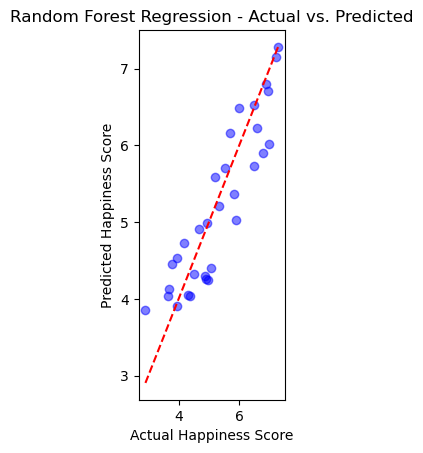

In [27]:
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Random Forest Regression - Actual vs. Predicted')

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model=GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [29]:
y_pred = gb_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 0.34655131222170543
R-squared: 0.7557348734134881


In [30]:
feature_importances = gb_model.feature_importances_

for feature, importance in zip(x.columns, feature_importances):
    print(feature, ":", importance)

Economy (GDP per Capita) : 0.45200412192439426
Family : 0.19936732333209958
Health (Life Expectancy) : 0.15929505494152732
Freedom : 0.103135098368178
Generosity : 0.03844827189967884
Trust (Government Corruption) : 0.04775012953412191


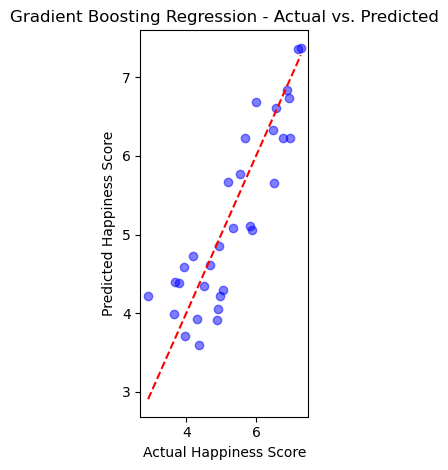

In [31]:
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Gradient Boosting Regression - Actual vs. Predicted')

plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
gb_model = GradientBoostingRegressor(random_state=42)

In [34]:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=1)

In [35]:
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [36]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(x_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Best Model - Mean Squared Error:", mse_best)

r_squared_best = r2_score(y_test, y_pred_best)
print("Best Model - R-squared:", r_squared_best)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Model - Mean Squared Error: 0.32203723587625666
Best Model - R-squared: 0.7730135093629077


In [37]:
y_pred_new = best_model.predict(x_test)
print("Predicted Happiness Scores:", y_pred_new)

Predicted Happiness Scores: [3.95674671 6.53184232 4.60687089 4.08530209 4.42112647 6.65074781
 4.03233108 4.01290643 5.07067134 4.55448366 6.79202825 5.29331473
 6.19826338 5.87487995 6.18662053 5.69806095 4.49536008 4.65027129
 4.1194569  6.17664064 4.00973982 6.76948326 7.35836089 7.3578853
 6.2619455  5.74723857 4.98716839 3.92371692 3.52404107 4.43552893
 4.37323393 5.14807427]


In [45]:
happiness_scores=df['Happiness Score']

In [46]:
happiness_scores

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [52]:
happiness_scores.head(32)

0     7.587
1     7.561
2     7.527
3     7.522
4     7.427
5     7.406
6     7.378
7     7.364
8     7.286
9     7.284
10    7.278
11    7.226
12    7.200
13    7.187
14    7.119
15    6.983
16    6.946
17    6.940
18    6.937
19    6.901
20    6.867
21    6.853
22    6.810
23    6.798
24    6.786
25    6.750
26    6.670
27    6.611
28    6.575
29    6.574
30    6.505
31    6.485
Name: Happiness Score, dtype: float64

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

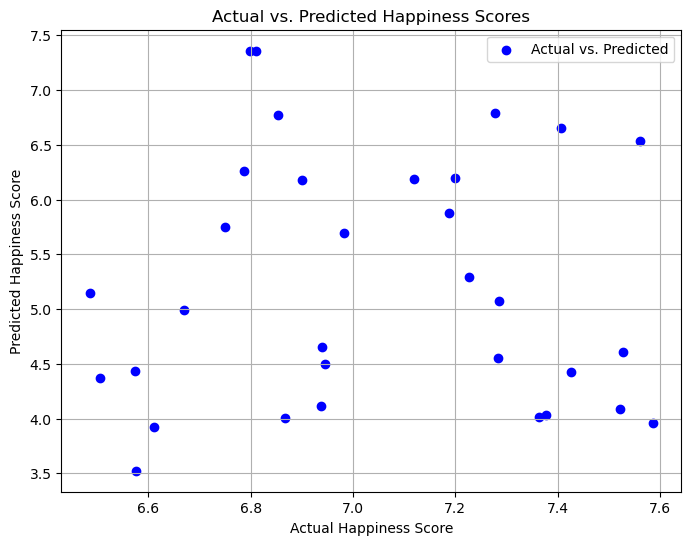

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(actual_scores, predicted_scores, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Scores')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

# Create RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search on training data
grid_search.fit(x_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train RandomForestRegressor model with best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(x_train, y_train)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(min_samples_leaf=2, random_state=42)

In [68]:
df['Squared_Economy (GDP per Capita)'] = df['Economy (GDP per Capita)'] ** 2
df['Family_Over_Health (Life Expectancy)'] = df['Family'] / df['Health (Life Expectancy)']

# Log transformation of skewed features
df['Log_Economy (GDP per Capita)'] = np.log(df['Economy (GDP per Capita)'])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Region'])

# Drop unnecessary columns
df.drop(['Country'], axis=1, inplace=True)

# Split data into features (X) and target variable (y)
x = df.drop(columns=['Happiness Score'])
y = df['Happiness Score']

Mean Squared Error: 0.2628823233559035
R-squared: 0.8147085821715025


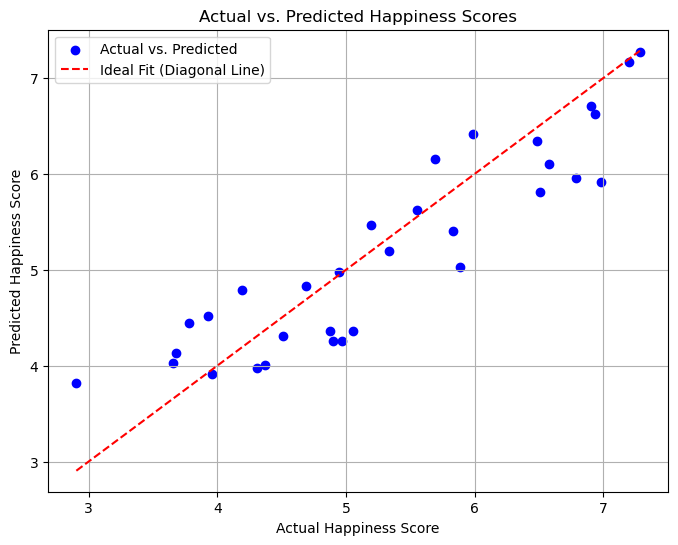

In [69]:
y_pred = model.predict(x_test)

# Calculate evaluation metrics (e.g., Mean Squared Error and R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit (Diagonal Line)')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs. Predicted Happiness Scores')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
from joblib import dump, load

In [88]:
dump(gb_model, 'gradient_boosting_model.joblib')
loaded_model = load('gradient_boosting_model.joblib')
predictions = loaded_model.predict(x_test)

In [91]:
print(predictions)

[3.92002746 6.65266303 4.72127665 4.19331559 4.29766157 6.6161635
 4.08183138 3.90759009 4.85726814 4.59224982 6.81607317 5.11012419
 6.22702142 5.79548033 6.22483513 5.65760891 4.34039588 4.6143559
 4.22226765 6.23087603 3.9844482  6.73832969 7.36110955 7.37571393
 6.33348421 5.67444094 5.06201741 3.68069788 3.59997292 4.36933691
 4.38415139 5.07945596]
